<a href="https://colab.research.google.com/github/KimJisanER/Dacon/blob/main/0906_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Pre-Step**

In [ ]:
 !pip install -q condacolab
import condacolab
condacolab.install()

import sys
sys.path

import condacolab
condacolab.check()

!mamba install -c conda-forge rdkit

✨🍰✨ Everything looks OK!
✨🍰✨ Everything looks OK!

                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.1) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['rdkit']

conda-forge/linux-64                   

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem
import rdkit
from rdkit.Chem.Draw import IPythonConsole
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from rdkit.Chem import Descriptors
import random

In [ ]:
!pip install mordred

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 86.8 MB/s eta 0:00:00
  Created wheel for mordred: filename=mordred-1.2.0-py3-none-any.whl size=176723 sha256=02e67c041f13d4487c1466b357ed3865fb09d0e34aa32344a118961fc5280b0f
  Stored in directory: /root/.cache/pip/wheels/a7/4f/b8/d4c6591f6ac944aaced7865b349477695f662388ad958743c7
Successfully built mordred


In [ ]:
def getMolDescriptors(mol, missingVal=None):
    ''' calculate the full list of descriptors for a molecule

        missingVal is used if the descriptor cannot be calculated
    '''
    res = {}
    for nm,fn in Descriptors._descList:
        # some of the descriptor fucntions can throw errors if they fail, catch those here:
        try:
            val = fn(mol)
        except:
            # print the error message:
            import traceback
            traceback.print_exc()
            # and set the descriptor value to whatever missingVal is
            val = missingVal
        res[nm] = val
    return res


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load data
train_HLM = pd.read_csv("/content/drive/MyDrive/metabolism_dacon/features/Data_HLM_train_raw.csv")
train_MLM = pd.read_csv("/content/drive/MyDrive/metabolism_dacon/features/Data_MLM_train_raw.csv")


test_HLM = pd.read_csv("/content/drive/MyDrive/metabolism_dacon/features/Data_MLM_test_raw.csv")
test_MLM = pd.read_csv("/content/drive/MyDrive/metabolism_dacon/features/Data_MLM_test_raw.csv")

full_HLM = pd.concat([train_HLM, test_HLM], axis = 0).reset_index(drop=True)
full_HLM['Molecule'] = full_HLM['SMILES'].apply(Chem.MolFromSmiles)

full_MLM = pd.concat([train_MLM, test_MLM], axis = 0).reset_index(drop=True)
full_MLM['Molecule'] = full_MLM['SMILES'].apply(Chem.MolFromSmiles)

In [ ]:
def seed_everything(seed=42):
    # Python의 난수 생성기 시드 고정
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"

In [ ]:
full_HLM

,id,SMILES,MLM,HLM,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea,Molecule
0,TRAIN_0000,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC,26.010,50.680,3.259,400.495,5,2,8,3.259,117.37,<rdkit.Chem.rdchem.Mol object at 0x791fcc9b6a40>
1,TRAIN_0001,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1,29.270,50.590,2.169,301.407,2,1,2,2.172,73.47,<rdkit.Chem.rdchem.Mol object at 0x791fcc9b6ab0>
2,TRAIN_0002,CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1,5.586,80.892,1.593,297.358,5,0,3,1.585,62.45,<rdkit.Chem.rdchem.Mol object at 0x791fcc9b6b20>
3,TRAIN_0003,Cc1ccc(-c2ccc(-n3nc(C)c(S(=O)(=O)N4CCN(C5CCCCC...,5.710,2.000,4.771,494.652,6,0,5,3.475,92.60,<rdkit.Chem.rdchem.Mol object at 0x791fcc9b6b90>
4,TRAIN_0004,Cc1ccc2c(c1)N(C(=O)c1ccncc1)CC(C)O2,93.270,99.990,2.335,268.310,3,0,1,2.337,42.43,<rdkit.Chem.rdchem.Mol object at 0x791fcc9b6c00>
...,...,...,...,...,...,...,...,...,...,...,...,...
5702,TEST_478,CCc1noc(CC)c1CC(=O)NCC1(CC)CCCCC1,NaN,NaN,4.207,306.443,2,1,7,4.207,55.13,<rdkit.Chem.rdchem.Mol object at 0x791fcd5882e0>
5703,TEST_479,CC(=O)N1CCC2(CC1)OC(=O)C(C)=C2C(=O)N1CCN(C)CC1,NaN,NaN,-0.608,335.398,5,0,1,-1.736,70.16,<rdkit.Chem.rdchem.Mol object at 0x791fcd588350>
5704,TEST_480,CC(C)NC(=O)CN1C(=O)c2ccccc2N2C(=O)c3ccccc3C12,NaN,NaN,1.792,349.383,3,1,3,1.792,69.72,<rdkit.Chem.rdchem.Mol object at 0x791fcd5883c0>
5705,TEST_481,Cn1cc(Br)c(=O)c(NC(=O)c2ccc(O)cc2F)c1,NaN,NaN,0.790,341.132,3,2,2,0.423,69.64,<rdkit.Chem.rdchem.Mol object at 0x791fcd588430>


In [ ]:
full_MLM

,id,SMILES,MLM,HLM,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea,Molecule
0,TRAIN_0000,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC,26.010,50.680,3.259,400.495,5,2,8,3.259,117.37,<rdkit.Chem.rdchem.Mol object at 0x791fcd504f90>
1,TRAIN_0001,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1,29.270,50.590,2.169,301.407,2,1,2,2.172,73.47,<rdkit.Chem.rdchem.Mol object at 0x791fcd588580>
2,TRAIN_0002,CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1,5.586,80.892,1.593,297.358,5,0,3,1.585,62.45,<rdkit.Chem.rdchem.Mol object at 0x791fcd5885f0>
3,TRAIN_0003,Cc1ccc(-c2ccc(-n3nc(C)c(S(=O)(=O)N4CCN(C5CCCCC...,5.710,2.000,4.771,494.652,6,0,5,3.475,92.60,<rdkit.Chem.rdchem.Mol object at 0x791fcd588660>
4,TRAIN_0004,Cc1ccc2c(c1)N(C(=O)c1ccncc1)CC(C)O2,93.270,99.990,2.335,268.310,3,0,1,2.337,42.43,<rdkit.Chem.rdchem.Mol object at 0x791fcd5886d0>
...,...,...,...,...,...,...,...,...,...,...,...,...
5448,TEST_478,CCc1noc(CC)c1CC(=O)NCC1(CC)CCCCC1,NaN,NaN,4.207,306.443,2,1,7,4.207,55.13,<rdkit.Chem.rdchem.Mol object at 0x791fcd422960>
5449,TEST_479,CC(=O)N1CCC2(CC1)OC(=O)C(C)=C2C(=O)N1CCN(C)CC1,NaN,NaN,-0.608,335.398,5,0,1,-1.736,70.16,<rdkit.Chem.rdchem.Mol object at 0x791fcd4229d0>
5450,TEST_480,CC(C)NC(=O)CN1C(=O)c2ccccc2N2C(=O)c3ccccc3C12,NaN,NaN,1.792,349.383,3,1,3,1.792,69.72,<rdkit.Chem.rdchem.Mol object at 0x791fcd422a40>
5451,TEST_481,Cn1cc(Br)c(=O)c(NC(=O)c2ccc(O)cc2F)c1,NaN,NaN,0.790,341.132,3,2,2,0.423,69.64,<rdkit.Chem.rdchem.Mol object at 0x791fcd422ab0>


In [ ]:
from tqdm import tqdm
from rdkit import DataStructs

allDescrs = [getMolDescriptors(m) for m in tqdm(full_HLM['Molecule'], desc="Generating descriptors")]
full_HLM_Descrs = pd.DataFrame(allDescrs)

allDescrs = [getMolDescriptors(m) for m in tqdm(full_MLM['Molecule'], desc="Generating descriptors")]
full_MLM_Descrs = pd.DataFrame(allDescrs)

Generating descriptors: 100%|██████████| 5453/5453 [01:30<00:00, 60.26it/s]


### **HLM_descriptors**

In [ ]:
fragment_counts = {}

def extract_sp3_carbon_fragments(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None

    fragments = []
    for atom in mol.GetAtoms():
        if atom.GetHybridization() == Chem.HybridizationType.SP3:
            neighbors = atom.GetNeighbors()
            fragment = Chem.EditableMol(Chem.Mol())
            atom_idx = fragment.AddAtom(atom)
            for neighbor in neighbors:
                bond = mol.GetBondBetweenAtoms(atom.GetIdx(), neighbor.GetIdx())
                if bond:
                    bond_order = bond.GetBondType()
                    neighbor_idx = fragment.AddAtom(neighbor)
                    fragment.AddBond(atom_idx, neighbor_idx, bond_order)
            fragments.append(fragment.GetMol())

    return fragments

# 데이터프레임의 각 행에 대해 반복
for index, row in full_HLM.iterrows():
    smiles = row['SMILES']
    fragments = extract_sp3_carbon_fragments(smiles)

    fragment_count = {}
    for idx, fragment in enumerate(fragments):
        fragment_smiles = Chem.MolToSmiles(fragment)
        if fragment_smiles in fragment_count:
            fragment_count[fragment_smiles] += 1
        else:
            fragment_count[fragment_smiles] = 1

    fragment_counts[index] = fragment_count

# fragment_counts를 사용하여 새로운 데이터프레임 생성
result_data = []
for index, counts in fragment_counts.items():
    counts['SMILES'] = full_HLM.loc[index, 'SMILES']
    result_data.append(counts)

result_df_HLM = pd.DataFrame(result_data).fillna(0).drop(columns='SMILES')

# 결과 데이터프레임 출력
print(result_df_HLM)

       CC  CCO  cCN   Cc  CCN  CC(C)C  CCC  CN(C)C  cS(N)(=O)=O  CN(C)S  ...  \
0     2.0  2.0  1.0  2.0  0.0     0.0  0.0     0.0          0.0     0.0  ...   
1     1.0  0.0  1.0  2.0  1.0     1.0  0.0     0.0          0.0     0.0  ...   
2     1.0  0.0  0.0  0.0  5.0     0.0  1.0     1.0          0.0     0.0  ...   
3     0.0  0.0  0.0  3.0  4.0     0.0  5.0     1.0          1.0     1.0  ...   
4     1.0  0.0  0.0  1.0  1.0     0.0  0.0     0.0          0.0     0.0  ...   
...   ...  ...  ...  ...  ...     ...  ...     ...          ...     ...  ...   
5702  3.0  0.0  0.0  0.0  1.0     0.0  6.0     0.0          0.0     0.0  ...   
5703  2.0  0.0  0.0  0.0  6.0     0.0  2.0     1.0          0.0     0.0  ...   
5704  2.0  0.0  0.0  0.0  1.0     0.0  0.0     0.0          0.0     0.0  ...   
5705  0.0  0.0  0.0  0.0  0.0     0.0  0.0     0.0          0.0     0.0  ...   
5706  2.0  0.0  0.0  0.0  5.0     1.0  1.0     2.0          0.0     0.0  ...   

      CC(F)F  CC(P)P  CC(C)(N)n  [2H]C(

In [ ]:
fragment_counts = {}

def extract_non_ring_sp2_fragments(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None

    fragments = []
    for atom in mol.GetAtoms():
        if atom.GetHybridization() == Chem.HybridizationType.SP2 and atom.IsInRing() == False:
            neighbors = atom.GetNeighbors()
            fragment = Chem.EditableMol(Chem.Mol())
            atom_idx = fragment.AddAtom(atom)
            for neighbor in neighbors:
                bond = mol.GetBondBetweenAtoms(atom.GetIdx(), neighbor.GetIdx())
                if bond:
                    bond_order = bond.GetBondType()
                    neighbor_idx = fragment.AddAtom(neighbor)
                    fragment.AddBond(atom_idx, neighbor_idx, bond_order)
            fragments.append(fragment.GetMol())

    return fragments

# 데이터프레임의 각 행에 대해 반복
for index, row in full_HLM.iterrows():
    smiles = row['SMILES']
    fragments = extract_non_ring_sp2_fragments(smiles)

    fragment_count = {}
    for idx, fragment in enumerate(fragments):
        fragment_smiles = Chem.MolToSmiles(fragment)
        if fragment_smiles in fragment_count:
            fragment_count[fragment_smiles] += 1
        else:
            fragment_count[fragment_smiles] = 1

    fragment_counts[index] = fragment_count

# fragment_counts를 사용하여 새로운 데이터프레임 생성
result_data = []
for index, counts in fragment_counts.items():
    counts['SMILES'] = full_HLM.loc[index, 'SMILES']
    result_data.append(counts)

result_df2_HLM = pd.DataFrame(result_data).fillna(0).drop(columns='SMILES')
result_df2_HLM.columns = ['non_ring_sp2_' + column for column in result_df2_HLM.columns]

# 결과 데이터프레임 출력
print(result_df2_HLM)


      non_ring_sp2_COc  non_ring_sp2_CNC  non_ring_sp2_cC(N)=O  \
0                  1.0               1.0                   1.0   
1                  0.0               0.0                   0.0   
2                  0.0               0.0                   0.0   
3                  0.0               0.0                   0.0   
4                  0.0               0.0                   1.0   
...                ...               ...                   ...   
5702               0.0               1.0                   0.0   
5703               0.0               0.0                   0.0   
5704               0.0               1.0                   0.0   
5705               0.0               0.0                   1.0   
5706               0.0               0.0                   0.0   

      non_ring_sp2_C=O  non_ring_sp2_cOC  non_ring_sp2_O=S  non_ring_sp2_c=O  \
0                  1.0               1.0               0.0               0.0   
1                  1.0               0.0       

In [ ]:
fragment_counts = {}

def extract_sp_carbon_fragments(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None

    fragments = []
    for atom in mol.GetAtoms():
        if atom.GetHybridization() == Chem.HybridizationType.SP:
            neighbors = atom.GetNeighbors()
            fragment = Chem.EditableMol(Chem.Mol())
            atom_idx = fragment.AddAtom(atom)
            for neighbor in neighbors:
                bond = mol.GetBondBetweenAtoms(atom.GetIdx(), neighbor.GetIdx())
                if bond:
                    bond_order = bond.GetBondType()
                    neighbor_idx = fragment.AddAtom(neighbor)
                    fragment.AddBond(atom_idx, neighbor_idx, bond_order)
            fragments.append(fragment.GetMol())

    return fragments

# 데이터프레임의 각 행에 대해 반복
for index, row in full_HLM.iterrows():
    smiles = row['SMILES']
    fragments = extract_sp_carbon_fragments(smiles)

    fragment_count = {}
    for idx, fragment in enumerate(fragments):
        fragment_smiles = Chem.MolToSmiles(fragment)
        if fragment_smiles in fragment_count:
            fragment_count[fragment_smiles] += 1
        else:
            fragment_count[fragment_smiles] = 1

    fragment_counts[index] = fragment_count

# fragment_counts를 사용하여 새로운 데이터프레임 생성
result_data = []
for index, counts in fragment_counts.items():
    counts['SMILES'] = full_HLM.loc[index, 'SMILES']
    result_data.append(counts)

result_df3_HLM = pd.DataFrame(result_data).fillna(0).drop(columns='SMILES')
result_df3_HLM.columns = ['sp_' + column for column in result_df3_HLM.columns]

# 결과 데이터프레임 출력
print(result_df3_HLM)

      sp_cC#N  sp_C#N  sp_CC#N  sp_C#CN  sp_C#Cc  sp_C#Cn  sp_N#CN  sp_C#CC  \
0         0.0     0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1         0.0     0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2         0.0     0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3         0.0     0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4         0.0     0.0      0.0      0.0      0.0      0.0      0.0      0.0   
...       ...     ...      ...      ...      ...      ...      ...      ...   
5702      0.0     0.0      0.0      0.0      0.0      0.0      0.0      0.0   
5703      0.0     0.0      0.0      0.0      0.0      0.0      0.0      0.0   
5704      0.0     0.0      0.0      0.0      0.0      0.0      0.0      0.0   
5705      0.0     0.0      0.0      0.0      0.0      0.0      0.0      0.0   
5706      0.0     0.0      0.0      0.0      0.0      0.0      0.0      0.0   

      sp_C#C  sp_[N-]=[N+]=N  
0        0.0        

In [ ]:
fragment_counts = {}

def extract_ring_sp2_fragments(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None

    fragments = []
    for atom in mol.GetAtoms():
        if atom.GetHybridization() == Chem.HybridizationType.SP2 and atom.IsInRing() == True:
            neighbors = atom.GetNeighbors()
            fragment = Chem.EditableMol(Chem.Mol())
            atom_idx = fragment.AddAtom(atom)
            for neighbor in neighbors:
                bond = mol.GetBondBetweenAtoms(atom.GetIdx(), neighbor.GetIdx())
                if bond:
                    bond_order = bond.GetBondType()
                    neighbor_idx = fragment.AddAtom(neighbor)
                    fragment.AddBond(atom_idx, neighbor_idx, bond_order)
            fragments.append(fragment.GetMol())

    return fragments

# 데이터프레임의 각 행에 대해 반복
for index, row in full_HLM.iterrows():
    smiles = row['SMILES']
    fragments = extract_ring_sp2_fragments(smiles)

    fragment_count = {}
    for idx, fragment in enumerate(fragments):
        fragment_smiles = Chem.MolToSmiles(fragment)
        if fragment_smiles in fragment_count:
            fragment_count[fragment_smiles] += 1
        else:
            fragment_count[fragment_smiles] = 1

    fragment_counts[index] = fragment_count

# fragment_counts를 사용하여 새로운 데이터프레임 생성
result_data = []
for index, counts in fragment_counts.items():
    counts['SMILES'] = full_HLM.loc[index, 'SMILES']
    result_data.append(counts)

result_df4_HLM = pd.DataFrame(result_data).fillna(0).drop(columns='SMILES')
result_df4_HLM.columns = ['ring_sp2_' + column for column in result_df4_HLM.columns]

# 결과 데이터프레임 출력
print(result_df4_HLM)


      ring_sp2_cc(c)O  ring_sp2_ccc  ring_sp2_cc(c)C  ring_sp2_cc(C)[nH]  \
0                 2.0           4.0              1.0                 1.0   
1                 0.0           4.0              0.0                 0.0   
2                 0.0           4.0              0.0                 0.0   
3                 0.0           6.0              1.0                 0.0   
4                 1.0           5.0              2.0                 0.0   
...               ...           ...              ...                 ...   
5702              0.0           0.0              1.0                 0.0   
5703              0.0           0.0              0.0                 0.0   
5704              0.0           8.0              3.0                 0.0   
5705              1.0           3.0              1.0                 0.0   
5706              0.0           2.0              0.0                 0.0   

      ring_sp2_cc(-c)n  ring_sp2_cc(-c)s  ring_sp2_csc  ring_sp2_Cc(n)s  \
0           

In [ ]:
def count_NandO(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None

    n_count = sum(1 for atom in mol.GetAtoms() if atom.GetSymbol() == 'N')
    o_count = sum(1 for atom in mol.GetAtoms() if atom.GetSymbol() == 'O')
    return n_count + o_count

NandO_data = []

for index, row in full_HLM.iterrows():
    smiles = row['SMILES']
    nando_count = count_NandO(smiles)

    if nando_count is not None:
        NandO_data.append({"NandO": nando_count})

NandO_df_HLM = pd.DataFrame(NandO_data)

print(NandO_df_HLM)


      NandO
0         7
1         4
2         7
3         8
4         4
...     ...
5702      4
5703      7
5704      6
5705      5
5706      3

[5707 rows x 1 columns]


In [ ]:
def count_3_and_4_membered_rings(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None, None

    in34 = sum(1 for ring in mol.GetRingInfo().AtomRings() if len(ring) in [3, 4])
    in56 = sum(1 for ring in mol.GetRingInfo().AtomRings() if len(ring) in [5, 6])

    return in34, in56

ring_data = []

for index, row in full_HLM.iterrows():
    smiles = row['SMILES']
    in34_count, in56_count = count_3_and_4_membered_rings(smiles)

    if in34_count is not None and in56_count is not None:
        ring_data.append({"in34": in34_count, "in56": in56_count})

ring_df_HLM = pd.DataFrame(ring_data)

print(ring_df_HLM)


      in34  in56
0        0     3
1        0     2
2        0     4
3        0     5
4        0     3
...    ...   ...
5702     0     2
5703     0     3
5704     0     4
5705     0     2
5706     0     2

[5707 rows x 2 columns]


In [ ]:
def count_non_conjugated_atoms(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None

    noncon_count = 0
    for atom in mol.GetAtoms():
        if not atom.IsInRing() and not atom.GetIsAromatic():
            noncon_count += 1

    return noncon_count

noncon_data = []

for index, row in full_HLM.iterrows():
    smiles = row['SMILES']
    noncon_count = count_non_conjugated_atoms(smiles)

    if noncon_count is not None:
        noncon_data.append({"noncon": noncon_count})

noncon_df_HLM = pd.DataFrame(noncon_data)

print(noncon_df_HLM)


      noncon
0         12
1          5
2          3
3          6
4          4
...      ...
5702      11
5703       8
5704       9
5705       8
5706       7

[5707 rows x 1 columns]


In [ ]:
def calculate_stereocenters(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    chiral_centers = Chem.FindMolChiralCenters(mol, includeUnassigned=True)
    return len(chiral_centers)

stereocenters_data = []

for index, row in full_HLM.iterrows():
    smiles = row['SMILES']
    stereocenters = calculate_stereocenters(smiles)

    if stereocenters is not None:
        stereocenters_data.append({"stereocenters": stereocenters})

stereocenters_df_HLM = pd.DataFrame(stereocenters_data)

print(stereocenters_df_HLM)


      stereocenters
0                 0
1                 1
2                 0
3                 0
4                 1
...             ...
5702              0
5703              0
5704              1
5705              0
5706              1

[5707 rows x 1 columns]


In [ ]:
def calculate_aromatic_proportion(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    aromatic_atoms = [atom for atom in mol.GetAtoms() if atom.GetIsAromatic()]
    total_atoms = mol.GetNumAtoms()
    if total_atoms == 0:
        return None
    return len(aromatic_atoms) / total_atoms

aromatic_proportion_data = []

for index, row in full_HLM.iterrows():
    smiles = row['SMILES']
    proportion = calculate_aromatic_proportion(smiles)

    if proportion is not None:
        aromatic_proportion_data.append({"aromatic_proportion": proportion})

aromatic_proportion_df_HLM = pd.DataFrame(aromatic_proportion_data)

print(aromatic_proportion_df_HLM)


      aromatic_proportion
0                0.571429
1                0.523810
2                0.590909
3                0.485714
4                0.600000
...                   ...
5702             0.227273
5703             0.000000
5704             0.461538
5705             0.600000
5706             0.277778

[5707 rows x 1 columns]


In [ ]:
def calculate_heavy_atom_count(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    return mol.GetNumHeavyAtoms()

heavy_atom_data = []

for index, row in full_HLM.iterrows():
    smiles = row['SMILES']
    heavy_atom_count = calculate_heavy_atom_count(smiles)

    if heavy_atom_count is not None:
        heavy_atom_data.append({"heavy_atom_count": heavy_atom_count})

heavy_atom_df_HLM = pd.DataFrame(heavy_atom_data)

print(heavy_atom_df_HLM)


      heavy_atom_count
0                   28
1                   21
2                   22
3                   35
4                   20
...                ...
5702                22
5703                24
5704                26
5705                20
5706                18

[5707 rows x 1 columns]


In [ ]:
def calculate_formal_charge(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    return Chem.rdmolops.GetFormalCharge(mol)

formal_charge_data = []

for index, row in full_HLM.iterrows():
    smiles = row['SMILES']
    charge = calculate_formal_charge(smiles)

    if charge is not None:
        formal_charge_data.append({"formal_charge": charge})

formal_charge_df_HLM = pd.DataFrame(formal_charge_data)

print(formal_charge_df_HLM)


      formal_charge
0                 0
1                 0
2                 0
3                 0
4                 0
...             ...
5702              0
5703              0
5704              0
5705              0
5706              0

[5707 rows x 1 columns]


In [ ]:
def calculate_rule_of_five_satisfactions(smiles, mol_MW, accptHB, donorHB):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None, None

    QPlogPo_w = Descriptors.MolLogP(mol)

    satisfactions = 0
    if mol_MW >= 500:
        satisfactions += 1
    if QPlogPo_w >= 5:
        satisfactions += 1
    if donorHB > 5:
        satisfactions += 1
    if accptHB > 10:
        satisfactions += 1

    return satisfactions, QPlogPo_w

rule_of_five_data = []

for index, row in full_HLM.iterrows():
    smiles = row['SMILES']
    mol_MW = row['Molecular_Weight']
    accptHB = row['Num_H_Acceptors']
    donorHB = row['Num_H_Donors']

    rule_of_five_satisfactions, QPlogPo_w_value = calculate_rule_of_five_satisfactions(smiles, mol_MW, accptHB, donorHB)

    if rule_of_five_satisfactions is not None:
        rule_of_five_data.append({
            "rule_of_five_satisfactions": rule_of_five_satisfactions,
            "QPlogPo_w": QPlogPo_w_value
        })

rule_of_five_df_HLM = pd.DataFrame(rule_of_five_data)

print(rule_of_five_df_HLM)


      rule_of_five_satisfactions  QPlogPo_w
0                              0    3.87744
1                              0    3.35474
2                              0    1.20450
3                              0    3.89356
4                              0    2.81772
...                          ...        ...
5702                           0    3.81860
5703                           0    0.01480
5704                           0    2.32600
5705                           0    2.24480
5706                           0    2.65670

[5707 rows x 2 columns]


In [ ]:
def calculate_molar_refractivity(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return Descriptors.MolMR(mol)
    return None

def calculate_vdw_volume(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return Descriptors.HeavyAtomCount(mol)
    return None

def calculate_molecular_flexibility(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return Descriptors.NumRotatableBonds(mol)
    return None

def calculate_electronegativity(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        total_eneg = sum([atom.GetAtomicNum() for atom in mol.GetAtoms()])
        return total_eneg
    return None

def calculate_pharmacophore_features(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return len([atom for atom in mol.GetAtoms() if atom.GetIsAromatic()])
    return None

data = []

for index, row in full_HLM.iterrows():
    smiles = row['SMILES']

    mr = calculate_molar_refractivity(smiles)
    vdw = calculate_vdw_volume(smiles)
    flex = calculate_molecular_flexibility(smiles)
    eneg = calculate_electronegativity(smiles)
    pharm = calculate_pharmacophore_features(smiles)

    data.append({"Molar Refractivity": mr,
                 "VdW Volume": vdw,
                 "Flexibility": flex,
                 "Electronegativity": eneg,
                 "Pharmacophore Features": pharm})

MVMEP_df_HLM = pd.DataFrame(data)

print(MVMEP_df_HLM)



      Molar Refractivity  VdW Volume  Flexibility  Electronegativity  \
0               109.1199          28            8                188   
1                86.8737          21            2                141   
2                85.0270          22            3                139   
3               136.0058          35            5                230   
4                77.1825          20            1                126   
...                  ...         ...          ...                ...   
5702             87.7817          22            7                138   
5703             87.0880          24            1                155   
5704             96.7497          26            3                165   
5705             75.4010          20            2                160   
5706             74.8410          18            5                112   

      Pharmacophore Features  
0                         16  
1                         11  
2                         13  
3          

In [ ]:
!pip install useful_rdkit_utils mols2grid

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 MB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.4/120.4 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.4/295.4 kB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.6/806.6 kB 63.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.2/385.2 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import useful_rdkit_utils as uru

def calculate_ring_counts(df):
    ring_system_finder = uru.RingSystemFinder()
    ring_counts = {}

    for index, row in df.iterrows():
        smiles = row['SMILES']
        mol = Chem.MolFromSmiles(smiles)

        if mol is not None:
            feats = ring_system_finder.find_ring_systems(mol)
            feature_count = {}

            for feat in feats:
                if feat in feature_count:
                    feature_count[feat] += 1
                else:
                    feature_count[feat] = 1

            ring_counts[index] = feature_count

    result_data = []
    for index, counts in ring_counts.items():
        counts['SMILES'] = df.loc[index, 'SMILES']
        result_data.append(counts)

    ring_df = pd.DataFrame(result_data).fillna(0).drop(columns='SMILES')
    ring_df.columns = ['RING_' + column for column in ring_df.columns]

    return ring_df

ring_HLM =calculate_ring_counts(full_HLM)
selected_columns = ring_HLM.columns[ring_HLM.count() > 10]
ring_HLM_filt = ring_HLM[selected_columns]

In [ ]:
ring_HLM_filt

,RING_c1ccccc1,RING_c1cn[nH]c1,RING_c1cscn1,RING_O=C1CCNc2ccccc2N1,RING_C1CNCCN1,RING_c1ccc2c(c1)cnn1nnnc21,RING_c1ccnnc1,RING_C1CCCCC1,RING_c1ccc2c(c1)NCCO2,RING_c1ccncc1,...,RING_C1CCN2CCCCC2C1,RING_c1nc2[nH]ncc2s1,RING_c1cc2n(n1)CCC2,RING_c1cc2cc3c(nc2s1)CCC3,RING_O=C1OCCn2cncc21,RING_C1=Cc2ncccc2OC1,RING_c1cn2cncc2nn1,RING_O=C1C=CC2(CCCCC2)O1,RING_N=C1NC(=O)[C@@H]2CCCN12,RING_C1=CC2(CCNCC2)c2ccccc21
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5703,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5705,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from mordred import Calculator, descriptors

calc = Calculator(descriptors, ignore_3D=True)
len(calc.descriptors)

1613

In [ ]:
mord_desc_HLM_df = calc.pandas([Chem.MolFromSmiles(x) for x in full_HLM.SMILES])

  4%|▍         | 248/5707 [01:26<1:11:42,  1.27it/s]

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 21%|██        | 1172/5707 [06:12<55:26,  1.36it/s]

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 70%|███████   | 3996/5707 [21:29<16:18,  1.75it/s]

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 78%|███████▊  | 4473/5707 [24:26<13:59,  1.47it/s]

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 78%|███████▊  | 4476/5707 [24:26<10:56,  1.87it/s]

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 78%|███████▊  | 4478/5707 [24:30<19:28,  1.05it/s]

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 91%|█████████▏| 5209/5707 [29:17<03:04,  2.70it/s]

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


100%|██████████| 5707/5707 [31:53<00:00,  2.98it/s]


In [ ]:
mord_desc_HLM_df.columns = ['mord_'+ column for column in mord_desc_HLM_df.columns]

In [ ]:
mord_desc_HLM_df.info()

<class 'mordred._base.pandas_module.MordredDataFrame'>
RangeIndex: 5707 entries, 0 to 5706
Columns: 1613 entries, mord_ABC to mord_mZagreb2
dtypes: bool(2), float64(682), int64(315), object(614)
memory usage: 70.2+ MB


In [ ]:
# object 형식 열 삭제
mord_desc_HLM_df.drop(columns=mord_desc_HLM_df.select_dtypes(include=['object']).columns, inplace=True)

# bool 형식 열을 0과 1로 인코딩
bool_columns = mord_desc_HLM_df.select_dtypes(include=['bool']).columns
mord_desc_HLM_df[bool_columns] = mord_desc_HLM_df[bool_columns].astype(int)

# 수정된 데이터프레임을 확인
print(mord_desc_HLM_df.head())

    mord_ABC  mord_ABCGG  mord_nAcid  mord_nBase  mord_nAromAtom  \
0  21.379612   17.449011           0           0              16   
1  16.539255   14.049653           0           0              11   
2  17.475469   13.660693           2           1              13   
3  27.857311   20.034364           0           1              17   
4  15.722758   12.817176           0           0              12   

   mord_nAromBond  mord_nAtom  mord_nHeavyAtom  mord_nSpiro  mord_nBridgehead  \
0              16          52               28            0                 0   
1              11          40               21            0                 0   
2              15          41               22            0                 0   
3              17          69               35            0                 0   
4              12          36               20            0                 0   

   ...  mord_SRW09  mord_SRW10  mord_TSRW10     mord_MW  mord_AMW  mord_WPath  \
0  ...    7.390799   10

In [ ]:
Data_HLM = pd.concat([full_HLM, full_HLM_Descrs, result_df_HLM, mord_desc_HLM_df, result_df2_HLM, result_df3_HLM, result_df4_HLM, NandO_df_HLM, ring_df_HLM, noncon_df_HLM, stereocenters_df_HLM, aromatic_proportion_df_HLM, heavy_atom_df_HLM, formal_charge_df_HLM, MVMEP_df_HLM, rule_of_five_df_HLM], axis=1).drop(columns=['Molecule', 'MolWt', 'NumHAcceptors', 'NumHDonors', 'NumRotatableBonds', 'MolLogP'])


In [ ]:
Data_HLM['beyond_Lipinski'] = 0

Data_HLM.loc[Data_HLM['Molecular_Weight'] >= 500, 'beyond_Lipinski'] += 1
Data_HLM.loc[Data_HLM['LogD'] >= 5, 'beyond_Lipinski'] += 1
Data_HLM.loc[Data_HLM['Num_H_Donors'] >= 5, 'beyond_Lipinski'] += 1
Data_HLM.loc[Data_HLM['Num_H_Acceptors'] >= 10, 'beyond_Lipinski'] += 1
Data_HLM.loc[Data_HLM['Num_RotatableBonds'] >= 10, 'beyond_Lipinski'] += 1
Data_HLM.loc[(Data_HLM['Num_H_Donors'] + Data_HLM['Num_H_Acceptors']) >= 12, 'beyond_Lipinski'] += 1
Data_HLM.loc[Data_HLM['TPSA'] >= 140, 'beyond_Lipinski'] += 1
Data_HLM.loc[Data_HLM['FractionCSP3'] <= 0.3, 'beyond_Lipinski'] += 1
Data_HLM.loc[Data_HLM['NumAromaticRings'] >= 5, 'beyond_Lipinski'] += 1
Data_HLM.loc[Data_HLM['NandO'] >= 10, 'beyond_Lipinski'] += 1
Data_HLM.loc[Data_HLM['NHOHCount'] >= 5, 'beyond_Lipinski'] += 1

In [ ]:
Data_HLM["Molecular_PolarSurfaceArea"] = np.where(pd.isna(Data_HLM["Molecular_PolarSurfaceArea"]), Data_HLM["TPSA"], Data_HLM["Molecular_PolarSurfaceArea"])

In [ ]:
# 'id' 컬럼에 'TEST' 문자열이 들어가는 행을 testset으로 선택
test_HLM = Data_HLM[Data_HLM['id'].str.contains('TEST')]

# 'id' 컬럼에 'TEST' 문자열이 들어가지 않는 행을 trainset으로 선택
train_HLM = Data_HLM[~Data_HLM['id'].str.contains('TEST')]

### **HLM_MIN-MAX 정규화 & Model**

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# 숫자형식 컬럼들의 min-max 정규화
scaler = MinMaxScaler()
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()
non_features = ['id', 'SMILES', 'MLM', 'HLM','Fingerprint']
features = [column for column in train_HLM.columns if column not in non_features]
train_HLM[features] = scaler.fit_transform(train_HLM[features])

test_HLM[features] = scaler.transform(test_HLM[features])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

In [ ]:
train_HLM.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5224 entries, 0 to 5223
Columns: 1845 entries, id to beyond_Lipinski
dtypes: float64(1843), object(2)
memory usage: 73.6+ MB


In [ ]:
train_HLM = train_HLM.drop(columns=['id', 'SMILES', 'MLM']).dropna(axis=0)

In [ ]:
train_HLM

,HLM,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea,MaxAbsEStateIndex,MaxEStateIndex,...,heavy_atom_count,formal_charge,Molar Refractivity,VdW Volume,Flexibility,Electronegativity,Pharmacophore Features,rule_of_five_satisfactions,QPlogPo_w,beyond_Lipinski
0,50.680,0.551836,0.192138,0.3125,0.153846,0.210526,0.576357,0.320878,0.696343,0.696343,...,0.209302,0.666667,0.218769,0.209302,0.242424,0.192727,0.410256,0.0,0.480778,0.0
1,50.590,0.469473,0.108751,0.1250,0.076923,0.052632,0.498714,0.197453,0.669702,0.669702,...,0.127907,0.666667,0.146289,0.127907,0.060606,0.107273,0.282051,0.0,0.437703,0.0
2,80.892,0.425948,0.105343,0.3125,0.000000,0.078947,0.456786,0.166470,0.152663,0.152663,...,0.139535,0.666667,0.140273,0.139535,0.090909,0.103636,0.333333,0.0,0.260507,0.0
3,2.000,0.666087,0.271376,0.3750,0.000000,0.131579,0.591786,0.251237,0.776741,0.776741,...,0.290698,0.666667,0.306365,0.290698,0.151515,0.269091,0.435897,0.0,0.482106,0.0
4,99.990,0.482016,0.080898,0.1875,0.000000,0.026316,0.510500,0.110183,0.708802,0.708802,...,0.116279,0.666667,0.114715,0.116279,0.030303,0.080000,0.307692,0.0,0.393449,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5219,72.000,0.416654,0.139857,0.3125,0.076923,0.078947,0.465714,0.262483,0.718498,0.718498,...,0.174419,0.666667,0.163154,0.174419,0.090909,0.141818,0.307692,0.0,0.282404,0.1
5220,99.000,0.379628,0.137290,0.3750,0.153846,0.078947,0.448571,0.354082,0.712684,0.712684,...,0.174419,0.666667,0.147064,0.174419,0.090909,0.143636,0.307692,0.0,0.241949,0.1
5221,91.900,0.501285,0.087142,0.1250,0.076923,0.131579,0.338571,0.089997,0.747423,0.747423,...,0.093023,0.666667,0.088709,0.093023,0.151515,0.083636,0.153846,0.0,0.409591,0.0
5222,63.000,0.609340,0.211515,0.2500,0.076923,0.131579,0.595714,0.173977,0.737127,0.737127,...,0.255814,0.666667,0.267321,0.255814,0.151515,0.212727,0.589744,0.0,0.492451,0.1


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam
from keras.metrics import RootMeanSquaredError
import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import mean_squared_error
import math
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# Define features and targets
non_features = ['id', 'SMILES', 'MLM', 'HLM', 'Fingerprint']
features = [column for column in train_HLM.columns if column not in non_features]
mlm_target = "MLM"
hlm_target = "HLM"

# Initialize KFold
seed = 42
n_splits = 10
kf = KFold(n_splits=n_splits, random_state=seed, shuffle=True)

# Initialize arrays to store models and scores
reg_mlms = []
reg_hlms = []

# Initialize arrays to store RMSE scores
mlm_rmse_scores = []
hlm_rmse_scores = []

# Loop through KFold splits
for i, (train_index, valid_index) in enumerate(kf.split(train_HLM)):
    df_train = train_HLM.iloc[train_index]
    df_valid = train_HLM.iloc[valid_index]

    x_train_num = df_train[features].values
    y_hlm_train = df_train[hlm_target].values
    x_valid_num = df_valid[features].values
    y_hlm_valid = df_valid[hlm_target].values


    # 이미지 입력 경로
    x1_input = keras.Input(shape=(x_train_num.shape[1],))
    x1 = layers.Dense(256, activation='relu')(x1_input)
    x1 = layers.BatchNormalization()(x1)
    x1 = layers.Dropout(0.2)(x1)
    merged = layers.Dense(1024, activation='relu')(x1)
    merged = layers.BatchNormalization()(merged)
    merged = layers.Dropout(0.2)(merged)
    merged = layers.Dense(512, activation='relu')(merged)
    merged = layers.BatchNormalization()(merged)
    merged = layers.Dropout(0.2)(merged)
    merged = layers.Dense(256, activation='relu')(merged)
    merged = layers.BatchNormalization()(merged)
    merged = layers.Dropout(0.2)(merged)
    merged = layers.Dense(128, activation='relu')(merged)
    merged = layers.BatchNormalization()(merged)

    # 회귀 모델 출력 레이어 추가
    outputs = layers.Dense(1)(merged)

    # 모델 생성
    model_hlm = keras.Model(inputs=x1_input, outputs=outputs)

    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=8,
    decay_rate=0.98)
    optimizer_decay = keras.optimizers.SGD(learning_rate=lr_schedule)

    model_hlm.compile(optimizer=optimizer_decay, loss='mean_squared_error', metrics=[RootMeanSquaredError()])

    checkpoint_hlm = ModelCheckpoint(f'model_hlm_fold{i}.h5', monitor='val_loss', verbose=0, save_best_only=True)
    early_stopping_hlm = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

    model_hlm.fit(x_train_num, y_hlm_train, epochs=500, batch_size=16, verbose=1, validation_data=(x_valid_num, y_hlm_valid),
                  callbacks=[checkpoint_hlm, early_stopping_hlm])

    reg_hlms.append(model_hlm)

    # Calculate RMSE for HLM predictions
    y_hlm_pred = model_hlm.predict(x_valid_num)
    hlm_rmse = math.sqrt(mean_squared_error(y_hlm_valid, y_hlm_pred))
    print(hlm_rmse)
    hlm_rmse_scores.append(hlm_rmse)

Epoch 1/500
294/294 [==============================] - 4s 7ms/step - loss: 1301.5051 - root_mean_squared_error: 36.0764 - val_loss: 943.0399 - val_root_mean_squared_error: 30.7090
Epoch 2/500
 10/294 [>.............................] - ETA: 1s - loss: 963.4874 - root_mean_squared_error: 31.0401 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


294/294 [==============================] - 2s 6ms/step - loss: 965.8436 - root_mean_squared_error: 31.0780 - val_loss: 913.6959 - val_root_mean_squared_error: 30.2274
Epoch 3/500
294/294 [==============================] - 2s 6ms/step - loss: 906.4670 - root_mean_squared_error: 30.1076 - val_loss: 852.1708 - val_root_mean_squared_error: 29.1920
Epoch 4/500
294/294 [==============================] - 2s 7ms/step - loss: 870.2465 - root_mean_squared_error: 29.4999 - val_loss: 841.1898 - val_root_mean_squared_error: 29.0033
Epoch 5/500
294/294 [==============================] - 2s 7ms/step - loss: 844.1072 - root_mean_squared_error: 29.0535 - val_loss: 824.7725 - val_root_mean_squared_error: 28.7189
Epoch 6/500
294/294 [==============================] - 2s 7ms/step - loss: 838.4155 - root_mean_squared_error: 28.9554 - val_loss: 825.5434 - val_root_mean_squared_error: 28.7323
Epoch 7/500
294/294 [==============================] - 2s 7ms/step - loss: 831.6086 - root_mean_squared_error: 28.837

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


294/294 [==============================] - 2s 7ms/step - loss: 952.5496 - root_mean_squared_error: 30.8634 - val_loss: 908.2757 - val_root_mean_squared_error: 30.1376
Epoch 3/500
294/294 [==============================] - 2s 7ms/step - loss: 892.1154 - root_mean_squared_error: 29.8683 - val_loss: 877.0661 - val_root_mean_squared_error: 29.6153
Epoch 4/500
294/294 [==============================] - 2s 7ms/step - loss: 873.9077 - root_mean_squared_error: 29.5619 - val_loss: 908.5867 - val_root_mean_squared_error: 30.1428
Epoch 5/500
294/294 [==============================] - 2s 6ms/step - loss: 844.5157 - root_mean_squared_error: 29.0606 - val_loss: 885.4717 - val_root_mean_squared_error: 29.7569
Epoch 6/500
294/294 [==============================] - 2s 7ms/step - loss: 840.8130 - root_mean_squared_error: 28.9968 - val_loss: 866.0598 - val_root_mean_squared_error: 29.4289
Epoch 7/500
294/294 [==============================] - 2s 6ms/step - loss: 839.7023 - root_mean_squared_error: 28.977

KeyboardInterrupt: ignored

In [ ]:
# 모든 fold에 대한 평균 RMSE 계산 후 출력
average_hlm_rmse = np.mean(hlm_rmse_scores)
print(f'Average RMSE for HLM over all folds: {average_hlm_rmse:.4f}')

Average RMSE for HLM over all folds: 29.6084


### **MLM_descriptor**

In [ ]:
fragment_counts = {}

def extract_sp3_carbon_fragments(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None

    fragments = []
    for atom in mol.GetAtoms():
        if atom.GetHybridization() == Chem.HybridizationType.SP3:
            neighbors = atom.GetNeighbors()
            fragment = Chem.EditableMol(Chem.Mol())
            atom_idx = fragment.AddAtom(atom)
            for neighbor in neighbors:
                bond = mol.GetBondBetweenAtoms(atom.GetIdx(), neighbor.GetIdx())
                if bond:
                    bond_order = bond.GetBondType()
                    neighbor_idx = fragment.AddAtom(neighbor)
                    fragment.AddBond(atom_idx, neighbor_idx, bond_order)
            fragments.append(fragment.GetMol())

    return fragments

# 데이터프레임의 각 행에 대해 반복
for index, row in full_MLM.iterrows():
    smiles = row['SMILES']
    fragments = extract_sp3_carbon_fragments(smiles)

    fragment_count = {}
    for idx, fragment in enumerate(fragments):
        fragment_smiles = Chem.MolToSmiles(fragment)
        if fragment_smiles in fragment_count:
            fragment_count[fragment_smiles] += 1
        else:
            fragment_count[fragment_smiles] = 1

    fragment_counts[index] = fragment_count

# fragment_counts를 사용하여 새로운 데이터프레임 생성
result_data = []
for index, counts in fragment_counts.items():
    counts['SMILES'] = full_MLM.loc[index, 'SMILES']
    result_data.append(counts)

result_df_MLM = pd.DataFrame(result_data).fillna(0).drop(columns='SMILES')

# 결과 데이터프레임 출력
print(result_df_MLM)

       CC  CCO  cCN   Cc  CCN  CC(C)C  CCC  CN(C)C  cS(N)(=O)=O  CN(C)S  ...  \
0     2.0  2.0  1.0  2.0  0.0     0.0  0.0     0.0          0.0     0.0  ...   
1     1.0  0.0  1.0  2.0  1.0     1.0  0.0     0.0          0.0     0.0  ...   
2     1.0  0.0  0.0  0.0  5.0     0.0  1.0     1.0          0.0     0.0  ...   
3     0.0  0.0  0.0  3.0  4.0     0.0  5.0     1.0          1.0     1.0  ...   
4     1.0  0.0  0.0  1.0  1.0     0.0  0.0     0.0          0.0     0.0  ...   
...   ...  ...  ...  ...  ...     ...  ...     ...          ...     ...  ...   
5448  3.0  0.0  0.0  0.0  1.0     0.0  6.0     0.0          0.0     0.0  ...   
5449  2.0  0.0  0.0  0.0  6.0     0.0  2.0     1.0          0.0     0.0  ...   
5450  2.0  0.0  0.0  0.0  1.0     0.0  0.0     0.0          0.0     0.0  ...   
5451  0.0  0.0  0.0  0.0  0.0     0.0  0.0     0.0          0.0     0.0  ...   
5452  2.0  0.0  0.0  0.0  5.0     1.0  1.0     2.0          0.0     0.0  ...   

      C[C@H](O)S  C[C@H](n)O  [11CH3]O 

In [ ]:
fragment_counts = {}

def extract_non_ring_sp2_fragments(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None

    fragments = []
    for atom in mol.GetAtoms():
        if atom.GetHybridization() == Chem.HybridizationType.SP2 and atom.IsInRing() == False:
            neighbors = atom.GetNeighbors()
            fragment = Chem.EditableMol(Chem.Mol())
            atom_idx = fragment.AddAtom(atom)
            for neighbor in neighbors:
                bond = mol.GetBondBetweenAtoms(atom.GetIdx(), neighbor.GetIdx())
                if bond:
                    bond_order = bond.GetBondType()
                    neighbor_idx = fragment.AddAtom(neighbor)
                    fragment.AddBond(atom_idx, neighbor_idx, bond_order)
            fragments.append(fragment.GetMol())

    return fragments

# 데이터프레임의 각 행에 대해 반복
for index, row in full_MLM.iterrows():
    smiles = row['SMILES']
    fragments = extract_non_ring_sp2_fragments(smiles)

    fragment_count = {}
    for idx, fragment in enumerate(fragments):
        fragment_smiles = Chem.MolToSmiles(fragment)
        if fragment_smiles in fragment_count:
            fragment_count[fragment_smiles] += 1
        else:
            fragment_count[fragment_smiles] = 1

    fragment_counts[index] = fragment_count

# fragment_counts를 사용하여 새로운 데이터프레임 생성
result_data = []
for index, counts in fragment_counts.items():
    counts['SMILES'] = full_MLM.loc[index, 'SMILES']
    result_data.append(counts)

result_df2_MLM = pd.DataFrame(result_data).fillna(0).drop(columns='SMILES')
result_df2_MLM.columns = ['non_ring_sp2_' + column for column in result_df2_MLM.columns]

# 결과 데이터프레임 출력
print(result_df2_MLM)


      non_ring_sp2_COc  non_ring_sp2_CNC  non_ring_sp2_cC(N)=O  \
0                  1.0               1.0                   1.0   
1                  0.0               0.0                   0.0   
2                  0.0               0.0                   0.0   
3                  0.0               0.0                   0.0   
4                  0.0               0.0                   1.0   
...                ...               ...                   ...   
5448               0.0               1.0                   0.0   
5449               0.0               0.0                   0.0   
5450               0.0               1.0                   0.0   
5451               0.0               0.0                   1.0   
5452               0.0               0.0                   0.0   

      non_ring_sp2_C=O  non_ring_sp2_cOC  non_ring_sp2_O=S  non_ring_sp2_c=O  \
0                  1.0               1.0               0.0               0.0   
1                  1.0               0.0       

In [ ]:
fragment_counts = {}

def extract_sp_carbon_fragments(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None

    fragments = []
    for atom in mol.GetAtoms():
        if atom.GetHybridization() == Chem.HybridizationType.SP:
            neighbors = atom.GetNeighbors()
            fragment = Chem.EditableMol(Chem.Mol())
            atom_idx = fragment.AddAtom(atom)
            for neighbor in neighbors:
                bond = mol.GetBondBetweenAtoms(atom.GetIdx(), neighbor.GetIdx())
                if bond:
                    bond_order = bond.GetBondType()
                    neighbor_idx = fragment.AddAtom(neighbor)
                    fragment.AddBond(atom_idx, neighbor_idx, bond_order)
            fragments.append(fragment.GetMol())

    return fragments

# 데이터프레임의 각 행에 대해 반복
for index, row in full_MLM.iterrows():
    smiles = row['SMILES']
    fragments = extract_sp_carbon_fragments(smiles)

    fragment_count = {}
    for idx, fragment in enumerate(fragments):
        fragment_smiles = Chem.MolToSmiles(fragment)
        if fragment_smiles in fragment_count:
            fragment_count[fragment_smiles] += 1
        else:
            fragment_count[fragment_smiles] = 1

    fragment_counts[index] = fragment_count

# fragment_counts를 사용하여 새로운 데이터프레임 생성
result_data = []
for index, counts in fragment_counts.items():
    counts['SMILES'] = full_MLM.loc[index, 'SMILES']
    result_data.append(counts)

result_df3_MLM = pd.DataFrame(result_data).fillna(0).drop(columns='SMILES')
result_df3_MLM.columns = ['sp_' + column for column in result_df3_MLM.columns]

# 결과 데이터프레임 출력
print(result_df3_MLM)

      sp_cC#N  sp_C#N  sp_CC#N  sp_C#CN  sp_C#Cc  sp_C#Cn  sp_N#CN  sp_C#CC  \
0         0.0     0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1         0.0     0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2         0.0     0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3         0.0     0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4         0.0     0.0      0.0      0.0      0.0      0.0      0.0      0.0   
...       ...     ...      ...      ...      ...      ...      ...      ...   
5448      0.0     0.0      0.0      0.0      0.0      0.0      0.0      0.0   
5449      0.0     0.0      0.0      0.0      0.0      0.0      0.0      0.0   
5450      0.0     0.0      0.0      0.0      0.0      0.0      0.0      0.0   
5451      0.0     0.0      0.0      0.0      0.0      0.0      0.0      0.0   
5452      0.0     0.0      0.0      0.0      0.0      0.0      0.0      0.0   

      sp_C#C  sp_[N-]=[N+]=N  
0        0.0        

In [ ]:
fragment_counts = {}

def extract_ring_sp2_fragments(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None

    fragments = []
    for atom in mol.GetAtoms():
        if atom.GetHybridization() == Chem.HybridizationType.SP2 and atom.IsInRing() == True:
            neighbors = atom.GetNeighbors()
            fragment = Chem.EditableMol(Chem.Mol())
            atom_idx = fragment.AddAtom(atom)
            for neighbor in neighbors:
                bond = mol.GetBondBetweenAtoms(atom.GetIdx(), neighbor.GetIdx())
                if bond:
                    bond_order = bond.GetBondType()
                    neighbor_idx = fragment.AddAtom(neighbor)
                    fragment.AddBond(atom_idx, neighbor_idx, bond_order)
            fragments.append(fragment.GetMol())

    return fragments

# 데이터프레임의 각 행에 대해 반복
for index, row in full_MLM.iterrows():
    smiles = row['SMILES']
    fragments = extract_ring_sp2_fragments(smiles)

    fragment_count = {}
    for idx, fragment in enumerate(fragments):
        fragment_smiles = Chem.MolToSmiles(fragment)
        if fragment_smiles in fragment_count:
            fragment_count[fragment_smiles] += 1
        else:
            fragment_count[fragment_smiles] = 1

    fragment_counts[index] = fragment_count

# fragment_counts를 사용하여 새로운 데이터프레임 생성
result_data = []
for index, counts in fragment_counts.items():
    counts['SMILES'] = full_MLM.loc[index, 'SMILES']
    result_data.append(counts)

result_df4_MLM = pd.DataFrame(result_data).fillna(0).drop(columns='SMILES')
result_df4_MLM.columns = ['ring_sp2_' + column for column in result_df4_MLM.columns]

# 결과 데이터프레임 출력
print(result_df4_MLM)

      ring_sp2_cc(c)O  ring_sp2_ccc  ring_sp2_cc(c)C  ring_sp2_cc(C)[nH]  \
0                 2.0           4.0              1.0                 1.0   
1                 0.0           4.0              0.0                 0.0   
2                 0.0           4.0              0.0                 0.0   
3                 0.0           6.0              1.0                 0.0   
4                 1.0           5.0              2.0                 0.0   
...               ...           ...              ...                 ...   
5448              0.0           0.0              1.0                 0.0   
5449              0.0           0.0              0.0                 0.0   
5450              0.0           8.0              3.0                 0.0   
5451              1.0           3.0              1.0                 0.0   
5452              0.0           2.0              0.0                 0.0   

      ring_sp2_cc(-c)n  ring_sp2_cc(-c)s  ring_sp2_csc  ring_sp2_Cc(n)s  \
0           

In [ ]:
def count_NandO(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None

    n_count = sum(1 for atom in mol.GetAtoms() if atom.GetSymbol() == 'N')
    o_count = sum(1 for atom in mol.GetAtoms() if atom.GetSymbol() == 'O')
    return n_count + o_count

NandO_data = []

for index, row in full_MLM.iterrows():
    smiles = row['SMILES']
    nando_count = count_NandO(smiles)

    if nando_count is not None:
        NandO_data.append({"NandO": nando_count})

NandO_df_MLM = pd.DataFrame(NandO_data)

print(NandO_df_MLM)

      NandO
0         7
1         4
2         7
3         8
4         4
...     ...
5448      4
5449      7
5450      6
5451      5
5452      3

[5453 rows x 1 columns]


In [ ]:
def count_3_and_4_membered_rings(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None, None

    in34 = sum(1 for ring in mol.GetRingInfo().AtomRings() if len(ring) in [3, 4])
    in56 = sum(1 for ring in mol.GetRingInfo().AtomRings() if len(ring) in [5, 6])

    return in34, in56

ring_data = []

for index, row in full_MLM.iterrows():
    smiles = row['SMILES']
    in34_count, in56_count = count_3_and_4_membered_rings(smiles)

    if in34_count is not None and in56_count is not None:
        ring_data.append({"in34": in34_count, "in56": in56_count})

ring_df_MLM = pd.DataFrame(ring_data)

print(ring_df_MLM)

      in34  in56
0        0     3
1        0     2
2        0     4
3        0     5
4        0     3
...    ...   ...
5448     0     2
5449     0     3
5450     0     4
5451     0     2
5452     0     2

[5453 rows x 2 columns]


In [ ]:
def count_non_conjugated_atoms(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None

    noncon_count = 0
    for atom in mol.GetAtoms():
        if not atom.IsInRing() and not atom.GetIsAromatic():
            noncon_count += 1

    return noncon_count

noncon_data = []

for index, row in full_MLM.iterrows():
    smiles = row['SMILES']
    noncon_count = count_non_conjugated_atoms(smiles)

    if noncon_count is not None:
        noncon_data.append({"noncon": noncon_count})

noncon_df_MLM = pd.DataFrame(noncon_data)

print(noncon_df_MLM)


      noncon
0         12
1          5
2          3
3          6
4          4
...      ...
5448      11
5449       8
5450       9
5451       8
5452       7

[5453 rows x 1 columns]


In [ ]:
def calculate_stereocenters(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    chiral_centers = Chem.FindMolChiralCenters(mol, includeUnassigned=True)
    return len(chiral_centers)

stereocenters_data = []

for index, row in full_MLM.iterrows():
    smiles = row['SMILES']
    stereocenters = calculate_stereocenters(smiles)

    if stereocenters is not None:
        stereocenters_data.append({"stereocenters": stereocenters})

stereocenters_df_MLM = pd.DataFrame(stereocenters_data)

print(stereocenters_df_MLM)


      stereocenters
0                 0
1                 1
2                 0
3                 0
4                 1
...             ...
5448              0
5449              0
5450              1
5451              0
5452              1

[5453 rows x 1 columns]


In [ ]:
def calculate_aromatic_proportion(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    aromatic_atoms = [atom for atom in mol.GetAtoms() if atom.GetIsAromatic()]
    total_atoms = mol.GetNumAtoms()
    if total_atoms == 0:
        return None
    return len(aromatic_atoms) / total_atoms

aromatic_proportion_data = []

for index, row in full_MLM.iterrows():
    smiles = row['SMILES']
    proportion = calculate_aromatic_proportion(smiles)

    if proportion is not None:
        aromatic_proportion_data.append({"aromatic_proportion": proportion})

aromatic_proportion_df_MLM = pd.DataFrame(aromatic_proportion_data)

print(aromatic_proportion_df_MLM)


      aromatic_proportion
0                0.571429
1                0.523810
2                0.590909
3                0.485714
4                0.600000
...                   ...
5448             0.227273
5449             0.000000
5450             0.461538
5451             0.600000
5452             0.277778

[5453 rows x 1 columns]


In [ ]:
def calculate_heavy_atom_count(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    return mol.GetNumHeavyAtoms()

heavy_atom_data = []

for index, row in full_MLM.iterrows():
    smiles = row['SMILES']
    heavy_atom_count = calculate_heavy_atom_count(smiles)

    if heavy_atom_count is not None:
        heavy_atom_data.append({"heavy_atom_count": heavy_atom_count})

heavy_atom_df_MLM = pd.DataFrame(heavy_atom_data)

print(heavy_atom_df_MLM)


      heavy_atom_count
0                   28
1                   21
2                   22
3                   35
4                   20
...                ...
5448                22
5449                24
5450                26
5451                20
5452                18

[5453 rows x 1 columns]


In [ ]:
def calculate_formal_charge(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    return Chem.rdmolops.GetFormalCharge(mol)

formal_charge_data = []

for index, row in full_MLM.iterrows():
    smiles = row['SMILES']
    charge = calculate_formal_charge(smiles)

    if charge is not None:
        formal_charge_data.append({"formal_charge": charge})

formal_charge_df_MLM = pd.DataFrame(formal_charge_data)

print(formal_charge_df_MLM)


      formal_charge
0                 0
1                 0
2                 0
3                 0
4                 0
...             ...
5448              0
5449              0
5450              0
5451              0
5452              0

[5453 rows x 1 columns]


In [ ]:
def calculate_rule_of_five_satisfactions(smiles, mol_MW, accptHB, donorHB):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None, None

    QPlogPo_w = Descriptors.MolLogP(mol)

    satisfactions = 0
    if mol_MW >= 500:
        satisfactions += 1
    if QPlogPo_w >= 5:
        satisfactions += 1
    if donorHB > 5:
        satisfactions += 1
    if accptHB > 10:
        satisfactions += 1

    return satisfactions, QPlogPo_w

rule_of_five_data = []

for index, row in full_MLM.iterrows():
    smiles = row['SMILES']
    mol_MW = row['Molecular_Weight']
    accptHB = row['Num_H_Acceptors']
    donorHB = row['Num_H_Donors']

    rule_of_five_satisfactions, QPlogPo_w_value = calculate_rule_of_five_satisfactions(smiles, mol_MW, accptHB, donorHB)

    if rule_of_five_satisfactions is not None:
        rule_of_five_data.append({
            "rule_of_five_satisfactions": rule_of_five_satisfactions,
            "QPlogPo_w": QPlogPo_w_value
        })

rule_of_five_df_MLM = pd.DataFrame(rule_of_five_data)

print(rule_of_five_df_MLM)


      rule_of_five_satisfactions  QPlogPo_w
0                              0    3.87744
1                              0    3.35474
2                              0    1.20450
3                              0    3.89356
4                              0    2.81772
...                          ...        ...
5448                           0    3.81860
5449                           0    0.01480
5450                           0    2.32600
5451                           0    2.24480
5452                           0    2.65670

[5453 rows x 2 columns]


In [ ]:
def calculate_molar_refractivity(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return Descriptors.MolMR(mol)
    return None

def calculate_vdw_volume(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return Descriptors.HeavyAtomCount(mol)
    return None

def calculate_molecular_flexibility(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return Descriptors.NumRotatableBonds(mol)
    return None

def calculate_electronegativity(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        total_eneg = sum([atom.GetAtomicNum() for atom in mol.GetAtoms()])
        return total_eneg
    return None

def calculate_pharmacophore_features(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return len([atom for atom in mol.GetAtoms() if atom.GetIsAromatic()])
    return None

data = []

for index, row in full_MLM.iterrows():
    smiles = row['SMILES']

    mr = calculate_molar_refractivity(smiles)
    vdw = calculate_vdw_volume(smiles)
    flex = calculate_molecular_flexibility(smiles)
    eneg = calculate_electronegativity(smiles)
    pharm = calculate_pharmacophore_features(smiles)

    data.append({"Molar Refractivity": mr,
                 "VdW Volume": vdw,
                 "Flexibility": flex,
                 "Electronegativity": eneg,
                 "Pharmacophore Features": pharm})

MVMEP_df_MLM = pd.DataFrame(data)

print(MVMEP_df_MLM)

      Molar Refractivity  VdW Volume  Flexibility  Electronegativity  \
0               109.1199          28            8                188   
1                86.8737          21            2                141   
2                85.0270          22            3                139   
3               136.0058          35            5                230   
4                77.1825          20            1                126   
...                  ...         ...          ...                ...   
5448             87.7817          22            7                138   
5449             87.0880          24            1                155   
5450             96.7497          26            3                165   
5451             75.4010          20            2                160   
5452             74.8410          18            5                112   

      Pharmacophore Features  
0                         16  
1                         11  
2                         13  
3          

In [ ]:
ring_MLM =calculate_ring_counts(full_MLM)
selected_columns = ring_MLM.columns[ring_MLM.count() > 10]
ring_MLM_filt = ring_MLM[selected_columns]

In [ ]:
from mordred import Calculator, descriptors

calc = Calculator(descriptors, ignore_3D=True)
len(calc.descriptors)

1613

In [ ]:
mord_desc_MLM_train = pd.read_csv('/content/drive/MyDrive/metabolism_dacon/features/mordred_MLM_train.csv')
mord_desc_MLM_test = pd.read_csv('/content/drive/MyDrive/metabolism_dacon/features/mordred_MLM_test.csv')
mord_desc_MLM_df = pd.concat([mord_desc_MLM_train, mord_desc_MLM_test], axis=0).reset_index(drop=True)

In [ ]:
mord_desc_MLM_df

,mord_ABC,mord_ABCGG,mord_nAcid,mord_nBase,mord_nAromAtom,mord_nAromBond,mord_nAtom,mord_nHeavyAtom,mord_nSpiro,mord_nBridgehead,...,mord_SRW09,mord_SRW10,mord_TSRW10,mord_MW,mord_AMW,mord_WPath,mord_WPol,mord_Zagreb1,mord_Zagreb2,mord_mZagreb2
0,21.379612,17.449011,0,0,16,16,52,28,0,0,...,7.390799,10.081676,78.761075,400.156912,7.695325,2380,40,142.0,165.0,6.361111
1,16.539255,14.049653,0,0,11,11,40,21,0,0,...,6.985642,9.907828,69.149596,301.124883,7.528122,870,35,112.0,132.0,4.527778
2,17.475469,13.660693,2,1,13,15,41,22,0,0,...,6.605298,10.144510,70.158066,297.170194,7.248054,1028,36,120.0,145.0,4.888889
3,27.857311,20.034364,0,1,17,17,69,35,0,0,...,7.034388,10.613467,86.199585,494.246395,7.162991,4170,61,192.0,231.0,7.500000
4,15.722758,12.817176,0,0,12,12,36,20,0,0,...,0.000000,9.978363,53.872357,268.121178,7.447810,762,32,106.0,125.0,4.361111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5448,16.291966,14.728760,0,0,5,5,52,22,0,0,...,6.803505,9.862509,69.656439,306.230728,5.889052,1138,32,108.0,125.0,5.222222
5449,18.777305,15.822051,0,1,0,0,49,24,1,0,...,7.208600,10.288852,73.647870,335.184506,6.840500,1280,42,130.0,157.0,5.180556
5450,20.648645,16.775304,0,0,12,12,45,26,0,0,...,7.247793,10.447235,76.277596,349.142641,7.758725,1469,48,144.0,177.0,5.611111
5451,15.343821,13.245018,0,0,12,12,30,20,0,0,...,0.000000,9.874728,53.565348,339.985883,11.332863,826,31,102.0,118.0,4.361111


In [ ]:
# mord_desc_MLM_df = calc.pandas([Chem.MolFromSmiles(x) for x in full_MLM.SMILES])

In [ ]:
# mord_desc_MLM_df.columns = ['mord_'+ column for column in mord_desc_MLM_df.columns]

In [ ]:
# mord_desc_MLM_df.info()

In [ ]:
# # object 형식 열 삭제
# mord_desc_MLM_df.drop(columns=mord_desc_MLM_df.select_dtypes(include=['object']).columns, inplace=True)

# # bool 형식 열을 0과 1로 인코딩
# bool_columns = mord_desc_MLM_df.select_dtypes(include=['bool']).columns
# mord_desc_MLM_df[bool_columns] = mord_desc_MLM_df[bool_columns].astype(int)

# # 수정된 데이터프레임을 확인
# print(mord_desc_MLM_df.head())

In [ ]:
Data_MLM = pd.concat([full_MLM, full_MLM_Descrs, result_df_MLM, mord_desc_MLM_df, result_df2_MLM, result_df3_MLM, result_df4_MLM, NandO_df_MLM, ring_df_MLM, noncon_df_MLM, stereocenters_df_MLM, aromatic_proportion_df_MLM, heavy_atom_df_MLM, formal_charge_df_MLM, MVMEP_df_MLM, rule_of_five_df_MLM], axis=1).drop(columns=['Molecule', 'MolWt', 'NumHAcceptors', 'NumHDonors', 'NumRotatableBonds', 'MolLogP'])


In [ ]:
Data_MLM

,id,SMILES,MLM,HLM,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,...,heavy_atom_count,formal_charge,Molar Refractivity,VdW Volume,Flexibility,Electronegativity,Pharmacophore Features,rule_of_five_satisfactions,QPlogPo_w,beyond_Lipinski
0,TRAIN_0000,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC,26.010,50.680,3.259,400.495,5,2,8,3.259,...,28,0,109.1199,28,8,188,16,0,3.87744,0
1,TRAIN_0001,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1,29.270,50.590,2.169,301.407,2,1,2,2.172,...,21,0,86.8737,21,2,141,11,0,3.35474,0
2,TRAIN_0002,CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1,5.586,80.892,1.593,297.358,5,0,3,1.585,...,22,0,85.0270,22,3,139,13,0,1.20450,0
3,TRAIN_0003,Cc1ccc(-c2ccc(-n3nc(C)c(S(=O)(=O)N4CCN(C5CCCCC...,5.710,2.000,4.771,494.652,6,0,5,3.475,...,35,0,136.0058,35,5,230,17,0,3.89356,0
4,TRAIN_0004,Cc1ccc2c(c1)N(C(=O)c1ccncc1)CC(C)O2,93.270,99.990,2.335,268.310,3,0,1,2.337,...,20,0,77.1825,20,1,126,12,0,2.81772,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5448,TEST_478,CCc1noc(CC)c1CC(=O)NCC1(CC)CCCCC1,NaN,NaN,4.207,306.443,2,1,7,4.207,...,22,0,87.7817,22,7,138,5,0,3.81860,0
5449,TEST_479,CC(=O)N1CCC2(CC1)OC(=O)C(C)=C2C(=O)N1CCN(C)CC1,NaN,NaN,-0.608,335.398,5,0,1,-1.736,...,24,0,87.0880,24,1,155,0,0,0.01480,0
5450,TEST_480,CC(C)NC(=O)CN1C(=O)c2ccccc2N2C(=O)c3ccccc3C12,NaN,NaN,1.792,349.383,3,1,3,1.792,...,26,0,96.7497,26,3,165,12,0,2.32600,1
5451,TEST_481,Cn1cc(Br)c(=O)c(NC(=O)c2ccc(O)cc2F)c1,NaN,NaN,0.790,341.132,3,2,2,0.423,...,20,0,75.4010,20,2,160,12,0,2.24480,1


In [ ]:
Data_MLM['beyond_Lipinski'] = 0

Data_MLM.loc[Data_MLM['Molecular_Weight'] >= 500, 'beyond_Lipinski'] += 1
Data_MLM.loc[Data_MLM['LogD'] >= 5, 'beyond_Lipinski'] += 1
Data_MLM.loc[Data_MLM['Num_H_Donors'] >= 5, 'beyond_Lipinski'] += 1
Data_MLM.loc[Data_MLM['Num_H_Acceptors'] >= 10, 'beyond_Lipinski'] += 1
Data_MLM.loc[Data_MLM['Num_RotatableBonds'] >= 10, 'beyond_Lipinski'] += 1
Data_MLM.loc[(Data_MLM['Num_H_Donors'] + Data_MLM['Num_H_Acceptors']) >= 12, 'beyond_Lipinski'] += 1
Data_MLM.loc[Data_MLM['TPSA'] >= 140, 'beyond_Lipinski'] += 1
Data_MLM.loc[Data_MLM['FractionCSP3'] <= 0.3, 'beyond_Lipinski'] += 1
Data_MLM.loc[Data_MLM['NumAromaticRings'] >= 5, 'beyond_Lipinski'] += 1
Data_MLM.loc[Data_MLM['NandO'] >= 10, 'beyond_Lipinski'] += 1
Data_MLM.loc[Data_MLM['NHOHCount'] >= 5, 'beyond_Lipinski'] += 1

In [ ]:
Data_MLM["Molecular_PolarSurfaceArea"] = np.where(pd.isna(Data_MLM["Molecular_PolarSurfaceArea"]), Data_MLM["TPSA"], Data_MLM["Molecular_PolarSurfaceArea"])

In [ ]:
# 'id' 컬럼에 'TEST' 문자열이 들어가는 행을 testset으로 선택
test_MLM = Data_MLM[Data_MLM['id'].str.contains('TEST')]

# 'id' 컬럼에 'TEST' 문자열이 들어가지 않는 행을 trainset으로 선택
train_MLM = Data_MLM[~Data_MLM['id'].str.contains('TEST')]

In [ ]:
missing_features = [feature for feature in features if feature not in test_MLM.columns]
print(missing_features)


['cC(C)(F)F', 'CC[S+]', 'C[S+](c)[O-]', 'CC(C)[N+]', 'C[N+]', '[Br-]', 'CC(N)S', 'NP(=O)(O)O', 'OP', 'COO', 'C[C@@H](C)[N+]', 'O', 'CC(P)P', 'NN', 'O=P([O-])(O)O', '[O-]P', 'mord_AXp-7d', 'mord_AXp-7dv', 'non_ring_sp2_cN(S)S', 'non_ring_sp2_CC(=N)N', 'non_ring_sp2_C=NP', 'non_ring_sp2_cOP', 'non_ring_sp2_CC=O', 'non_ring_sp2_NC=O', 'ring_sp2_cc(n)[S+]', 'ring_sp2_[nH]c(n)=S', 'ring_sp2_cc(c)[S+]', 'ring_sp2_nsn', 'ring_sp2_C=C(C)P', 'ring_sp2_cc(C)[n+]']


### **MLM_MIN-MAX 정규화 & Model**

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# 숫자형식 컬럼들의 min-max 정규화
scaler = MinMaxScaler()
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()
non_features = ['id', 'SMILES', 'MLM', 'HLM','Fingerprint']
features = [column for column in train_MLM.columns if column not in non_features]
train_MLM[features] = scaler.fit_transform(train_MLM[features])

test_MLM[features] = scaler.transform(test_MLM[features])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

In [ ]:
duplicates = full_MLM[full_MLM.duplicated(subset='SMILES', keep=False)].sort_values(by='SMILES')

In [ ]:
train_MLM = train_MLM.drop(columns=['HLM']).dropna(axis=0)

In [ ]:
train_MLM.to_csv('/content/drive/MyDrive/metabolism_dacon/train_MLM_0923.csv',index=False)
test_MLM.to_csv('/content/drive/MyDrive/metabolism_dacon/test_MLM_0923.csv',index=False)
train_HLM.to_csv('/content/drive/MyDrive/metabolism_dacon/train_HLM_0923.csv',index=False)
test_HLM.to_csv('/content/drive/MyDrive/metabolism_dacon/test_HLM_0923.csv',index=False)

In [ ]:
train_HLM

,HLM,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea,MaxAbsEStateIndex,MaxEStateIndex,...,heavy_atom_count,formal_charge,Molar Refractivity,VdW Volume,Flexibility,Electronegativity,Pharmacophore Features,rule_of_five_satisfactions,QPlogPo_w,beyond_Lipinski
0,50.680,0.551836,0.192138,0.3125,0.153846,0.210526,0.576357,0.320878,0.696343,0.696343,...,0.209302,0.666667,0.218769,0.209302,0.242424,0.192727,0.410256,0.0,0.480778,0.0
1,50.590,0.469473,0.108751,0.1250,0.076923,0.052632,0.498714,0.197453,0.669702,0.669702,...,0.127907,0.666667,0.146289,0.127907,0.060606,0.107273,0.282051,0.0,0.437703,0.0
2,80.892,0.425948,0.105343,0.3125,0.000000,0.078947,0.456786,0.166470,0.152663,0.152663,...,0.139535,0.666667,0.140273,0.139535,0.090909,0.103636,0.333333,0.0,0.260507,0.0
3,2.000,0.666087,0.271376,0.3750,0.000000,0.131579,0.591786,0.251237,0.776741,0.776741,...,0.290698,0.666667,0.306365,0.290698,0.151515,0.269091,0.435897,0.0,0.482106,0.0
4,99.990,0.482016,0.080898,0.1875,0.000000,0.026316,0.510500,0.110183,0.708802,0.708802,...,0.116279,0.666667,0.114715,0.116279,0.030303,0.080000,0.307692,0.0,0.393449,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5219,72.000,0.416654,0.139857,0.3125,0.076923,0.078947,0.465714,0.262483,0.718498,0.718498,...,0.174419,0.666667,0.163154,0.174419,0.090909,0.141818,0.307692,0.0,0.282404,0.1
5220,99.000,0.379628,0.137290,0.3750,0.153846,0.078947,0.448571,0.354082,0.712684,0.712684,...,0.174419,0.666667,0.147064,0.174419,0.090909,0.143636,0.307692,0.0,0.241949,0.1
5221,91.900,0.501285,0.087142,0.1250,0.076923,0.131579,0.338571,0.089997,0.747423,0.747423,...,0.093023,0.666667,0.088709,0.093023,0.151515,0.083636,0.153846,0.0,0.409591,0.0
5222,63.000,0.609340,0.211515,0.2500,0.076923,0.131579,0.595714,0.173977,0.737127,0.737127,...,0.255814,0.666667,0.267321,0.255814,0.151515,0.212727,0.589744,0.0,0.492451,0.1


In [ ]:
test_HLM

,id,SMILES,MLM,HLM,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,...,heavy_atom_count,formal_charge,Molar Refractivity,VdW Volume,Flexibility,Electronegativity,Pharmacophore Features,rule_of_five_satisfactions,QPlogPo_w,beyond_Lipinski
5224,TEST_000,CC(C)Nc1ccnc(N2CCN(Cc3cccs3)C(CCO)C2)n1,NaN,NaN,0.505138,0.159326,0.2500,0.153846,0.184211,0.531786,...,0.174419,0.666667,0.199558,0.174419,0.212121,0.154545,0.282051,0.0,0.361629,0.0
5225,TEST_001,COc1cc(=O)n(-c2ccccc2)cc1C(=O)N1CCC2(CC1)OCCO2,NaN,NaN,0.349781,0.166811,0.3125,0.000000,0.078947,0.385357,...,0.197674,0.666667,0.183724,0.197674,0.090909,0.167273,0.307692,0.0,0.311657,0.0
5226,TEST_002,Cc1cccc(NC(=N)/N=c2\nc(O)c(Cc3ccccc3)c(C)[nH]2)c1,NaN,NaN,0.628684,0.147468,0.2500,0.307692,0.131579,0.650000,...,0.186047,0.666667,0.196643,0.186047,0.090909,0.147273,0.461538,0.0,0.430762,0.1
5227,TEST_003,O=C(c1nc2ncccn2n1)N1CCCn2cc(-c3ccccc3)nc21,NaN,NaN,0.441212,0.145738,0.3125,0.000000,0.052632,0.471786,...,0.186047,0.666667,0.171913,0.186047,0.060606,0.150909,0.512821,0.0,0.329218,0.1
5228,TEST_004,CCN1CCN(C(=O)c2cc3c(=O)n4cc(C)ccc4nc3n2C)CC1,NaN,NaN,0.397688,0.152520,0.2500,0.000000,0.052632,0.355643,...,0.186047,0.666667,0.191315,0.186047,0.060606,0.150909,0.333333,0.0,0.266096,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,TEST_478,CCc1noc(CC)c1CC(=O)NCC1(CC)CCCCC1,NaN,NaN,0.623470,0.112989,0.1250,0.076923,0.184211,0.644071,...,0.139535,0.666667,0.149248,0.139535,0.212121,0.101818,0.128205,0.0,0.475929,0.0
5703,TEST_479,CC(=O)N1CCC2(CC1)OC(=O)C(C)=C2C(=O)N1CCN(C)CC1,NaN,NaN,0.259634,0.137356,0.3125,0.000000,0.026316,0.219571,...,0.162791,0.666667,0.146987,0.162791,0.030303,0.132727,0.000000,0.0,0.162467,0.0
5704,TEST_480,CC(C)NC(=O)CN1C(=O)c2ccccc2N2C(=O)c3ccccc3C12,NaN,NaN,0.440985,0.149125,0.1875,0.076923,0.078947,0.471571,...,0.186047,0.666667,0.178466,0.186047,0.090909,0.150909,0.307692,0.0,0.352927,0.1
5705,TEST_481,Cn1cc(Br)c(=O)c(NC(=O)c2ccc(O)cc2F)c1,NaN,NaN,0.365271,0.142181,0.1875,0.153846,0.052632,0.373786,...,0.116279,0.666667,0.108910,0.116279,0.060606,0.141818,0.307692,0.0,0.346236,0.1


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam
from keras.metrics import RootMeanSquaredError
import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import mean_squared_error
import math
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# Define features and targets
non_features = ['id', 'SMILES', 'MLM', 'HLM', 'Fingerprint']
features = [column for column in train_MLM.columns if column not in non_features]
mlm_target = "MLM"

# Initialize KFold
seed = 42
n_splits = 10
kf = KFold(n_splits=n_splits, random_state=seed, shuffle=True)

# Initialize arrays to store models and scores
reg_mlms = []

# Initialize arrays to store RMSE scores
mlm_rmse_scores = []

# Loop through KFold splits
for i, (train_index, valid_index) in enumerate(kf.split(train_MLM)):
    df_train = train_MLM.iloc[train_index]
    df_valid = train_MLM.iloc[valid_index]

    x_train_num = df_train[features].values

    y_mlm_train = df_train[mlm_target].values

    x_valid_num = df_valid[features].values

    y_mlm_valid = df_valid[mlm_target].values

    # Create and compile another model for HLM
    # 이미지 입력 경로
    x1_input = keras.Input(shape=(x_train_num.shape[1],))
    x1 = layers.Dense(256, activation='relu')(x1_input)
    x1 = layers.BatchNormalization()(x1)
    x1 = layers.Dropout(0.2)(x1)
    merged = layers.Dense(1024, activation='relu')(x1)
    merged = layers.BatchNormalization()(merged)
    merged = layers.Dropout(0.2)(merged)
    merged = layers.Dense(512, activation='relu')(merged)
    merged = layers.BatchNormalization()(merged)
    merged = layers.Dropout(0.2)(merged)
    merged = layers.Dense(256, activation='relu')(merged)
    merged = layers.BatchNormalization()(merged)
    merged = layers.Dropout(0.2)(merged)
    merged = layers.Dense(128, activation='relu')(merged)
    merged = layers.BatchNormalization()(merged)

    # 회귀 모델 출력 레이어 추가
    outputs = layers.Dense(1)(merged)

    # 모델 생성
    model_mlm = keras.Model(inputs=x1_input, outputs=outputs)

    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=8,
    decay_rate=0.98)
    optimizer_decay = keras.optimizers.SGD(learning_rate=lr_schedule)

    model_mlm.compile(optimizer=optimizer_decay, loss='mean_squared_error', metrics=[RootMeanSquaredError()])


    # Train the model
    checkpoint_mlm = ModelCheckpoint(f'model_mlm_fold{i}.h5', monitor='val_loss', verbose=0, save_best_only=True)
    early_stopping_mlm = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

    model_mlm.fit(x_train_num, y_mlm_train, epochs=500, batch_size=16, verbose=1, validation_data=(x_valid_num, y_mlm_valid),
              callbacks=[checkpoint_mlm, early_stopping_mlm])
    reg_mlms.append(model_mlm)

    # Calculate RMSE for MLM predictions
    y_mlm_pred = model_mlm.predict(x_valid_num)
    mlm_rmse = math.sqrt(mean_squared_error(y_mlm_valid, y_mlm_pred))
    print(mlm_rmse)
    mlm_rmse_scores.append(mlm_rmse)


Epoch 1/500
279/279 [==============================] - 4s 7ms/step - loss: 1217.8165 - root_mean_squared_error: 34.8972 - val_loss: 1058.2355 - val_root_mean_squared_error: 32.5305
Epoch 2/500
 10/279 [>.............................] - ETA: 1s - loss: 1009.2368 - root_mean_squared_error: 31.7685

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


279/279 [==============================] - 2s 6ms/step - loss: 921.6860 - root_mean_squared_error: 30.3593 - val_loss: 1032.5134 - val_root_mean_squared_error: 32.1327
Epoch 3/500
279/279 [==============================] - 2s 6ms/step - loss: 867.8923 - root_mean_squared_error: 29.4600 - val_loss: 992.3885 - val_root_mean_squared_error: 31.5022
Epoch 4/500
279/279 [==============================] - 2s 7ms/step - loss: 802.6982 - root_mean_squared_error: 28.3319 - val_loss: 937.3671 - val_root_mean_squared_error: 30.6165
Epoch 5/500
279/279 [==============================] - 2s 7ms/step - loss: 795.0716 - root_mean_squared_error: 28.1970 - val_loss: 928.7927 - val_root_mean_squared_error: 30.4761
Epoch 6/500
279/279 [==============================] - 2s 7ms/step - loss: 779.4554 - root_mean_squared_error: 27.9187 - val_loss: 940.1686 - val_root_mean_squared_error: 30.6622
Epoch 7/500
279/279 [==============================] - 2s 7ms/step - loss: 774.5854 - root_mean_squared_error: 27.83

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


279/279 [==============================] - 2s 7ms/step - loss: 917.1138 - root_mean_squared_error: 30.2839 - val_loss: 877.4858 - val_root_mean_squared_error: 29.6224
Epoch 3/500
279/279 [==============================] - 2s 7ms/step - loss: 847.1027 - root_mean_squared_error: 29.1050 - val_loss: 862.9915 - val_root_mean_squared_error: 29.3767
Epoch 4/500
279/279 [==============================] - 2s 7ms/step - loss: 809.2318 - root_mean_squared_error: 28.4470 - val_loss: 857.1040 - val_root_mean_squared_error: 29.2763
Epoch 5/500
279/279 [==============================] - 2s 6ms/step - loss: 801.2501 - root_mean_squared_error: 28.3064 - val_loss: 880.4717 - val_root_mean_squared_error: 29.6727
Epoch 6/500
279/279 [==============================] - 2s 6ms/step - loss: 777.5903 - root_mean_squared_error: 27.8853 - val_loss: 865.3254 - val_root_mean_squared_error: 29.4164
Epoch 7/500
279/279 [==============================] - 2s 6ms/step - loss: 775.8640 - root_mean_squared_error: 27.854

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


279/279 [==============================] - 2s 7ms/step - loss: 932.2987 - root_mean_squared_error: 30.5336 - val_loss: 917.7525 - val_root_mean_squared_error: 30.2944
Epoch 3/500
279/279 [==============================] - 2s 7ms/step - loss: 867.9186 - root_mean_squared_error: 29.4605 - val_loss: 898.6115 - val_root_mean_squared_error: 29.9768
Epoch 4/500
279/279 [==============================] - 2s 7ms/step - loss: 808.4736 - root_mean_squared_error: 28.4337 - val_loss: 876.6538 - val_root_mean_squared_error: 29.6083
Epoch 5/500
279/279 [==============================] - 2s 7ms/step - loss: 796.5703 - root_mean_squared_error: 28.2236 - val_loss: 864.1074 - val_root_mean_squared_error: 29.3957
Epoch 6/500
279/279 [==============================] - 2s 6ms/step - loss: 777.9235 - root_mean_squared_error: 27.8913 - val_loss: 865.5232 - val_root_mean_squared_error: 29.4198
Epoch 7/500
279/279 [==============================] - 2s 7ms/step - loss: 792.1949 - root_mean_squared_error: 28.146

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


279/279 [==============================] - 2s 6ms/step - loss: 927.7478 - root_mean_squared_error: 30.4590 - val_loss: 957.1203 - val_root_mean_squared_error: 30.9374
Epoch 3/500
279/279 [==============================] - 2s 6ms/step - loss: 857.2706 - root_mean_squared_error: 29.2792 - val_loss: 950.5835 - val_root_mean_squared_error: 30.8315
Epoch 4/500
279/279 [==============================] - 2s 6ms/step - loss: 811.2842 - root_mean_squared_error: 28.4831 - val_loss: 853.7397 - val_root_mean_squared_error: 29.2188
Epoch 5/500
279/279 [==============================] - 2s 6ms/step - loss: 803.3109 - root_mean_squared_error: 28.3427 - val_loss: 845.1248 - val_root_mean_squared_error: 29.0710
Epoch 6/500
279/279 [==============================] - 2s 6ms/step - loss: 782.0947 - root_mean_squared_error: 27.9660 - val_loss: 846.4894 - val_root_mean_squared_error: 29.0945
Epoch 7/500
279/279 [==============================] - 2s 6ms/step - loss: 780.8812 - root_mean_squared_error: 27.944

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


279/279 [==============================] - 2s 6ms/step - loss: 929.5176 - root_mean_squared_error: 30.4880 - val_loss: 863.4962 - val_root_mean_squared_error: 29.3853
Epoch 3/500
279/279 [==============================] - 2s 6ms/step - loss: 862.2952 - root_mean_squared_error: 29.3649 - val_loss: 865.3458 - val_root_mean_squared_error: 29.4168
Epoch 4/500
279/279 [==============================] - 2s 7ms/step - loss: 820.1392 - root_mean_squared_error: 28.6381 - val_loss: 861.1071 - val_root_mean_squared_error: 29.3446
Epoch 5/500
279/279 [==============================] - 2s 7ms/step - loss: 790.4839 - root_mean_squared_error: 28.1155 - val_loss: 857.7542 - val_root_mean_squared_error: 29.2874
Epoch 6/500
279/279 [==============================] - 2s 7ms/step - loss: 783.7709 - root_mean_squared_error: 27.9959 - val_loss: 850.0380 - val_root_mean_squared_error: 29.1554
Epoch 7/500
279/279 [==============================] - 2s 7ms/step - loss: 767.9644 - root_mean_squared_error: 27.712

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


279/279 [==============================] - 2s 7ms/step - loss: 910.5936 - root_mean_squared_error: 30.1760 - val_loss: 908.8373 - val_root_mean_squared_error: 30.1469
Epoch 3/500
279/279 [==============================] - 2s 7ms/step - loss: 854.5687 - root_mean_squared_error: 29.2330 - val_loss: 875.1115 - val_root_mean_squared_error: 29.5823
Epoch 4/500
279/279 [==============================] - 2s 7ms/step - loss: 832.3842 - root_mean_squared_error: 28.8511 - val_loss: 870.4080 - val_root_mean_squared_error: 29.5027
Epoch 5/500
279/279 [==============================] - 2s 7ms/step - loss: 794.0460 - root_mean_squared_error: 28.1788 - val_loss: 871.2682 - val_root_mean_squared_error: 29.5173
Epoch 6/500
279/279 [==============================] - 2s 6ms/step - loss: 793.3685 - root_mean_squared_error: 28.1668 - val_loss: 870.4641 - val_root_mean_squared_error: 29.5036
Epoch 7/500
279/279 [==============================] - 2s 7ms/step - loss: 786.0181 - root_mean_squared_error: 28.036

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


279/279 [==============================] - 2s 7ms/step - loss: 921.5017 - root_mean_squared_error: 30.3562 - val_loss: 887.4763 - val_root_mean_squared_error: 29.7905
Epoch 3/500
279/279 [==============================] - 2s 7ms/step - loss: 859.1437 - root_mean_squared_error: 29.3112 - val_loss: 783.1019 - val_root_mean_squared_error: 27.9840
Epoch 4/500
279/279 [==============================] - 2s 7ms/step - loss: 823.2643 - root_mean_squared_error: 28.6926 - val_loss: 766.4446 - val_root_mean_squared_error: 27.6847
Epoch 5/500
279/279 [==============================] - 2s 7ms/step - loss: 814.0349 - root_mean_squared_error: 28.5313 - val_loss: 751.6810 - val_root_mean_squared_error: 27.4168
Epoch 6/500
279/279 [==============================] - 2s 7ms/step - loss: 784.7772 - root_mean_squared_error: 28.0139 - val_loss: 757.5797 - val_root_mean_squared_error: 27.5242
Epoch 7/500
279/279 [==============================] - 2s 7ms/step - loss: 780.3388 - root_mean_squared_error: 27.934

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


279/279 [==============================] - 2s 6ms/step - loss: 926.9994 - root_mean_squared_error: 30.4467 - val_loss: 848.9305 - val_root_mean_squared_error: 29.1364
Epoch 3/500
279/279 [==============================] - 2s 6ms/step - loss: 860.6914 - root_mean_squared_error: 29.3375 - val_loss: 874.4291 - val_root_mean_squared_error: 29.5707
Epoch 4/500
279/279 [==============================] - 2s 7ms/step - loss: 815.4973 - root_mean_squared_error: 28.5569 - val_loss: 847.4314 - val_root_mean_squared_error: 29.1107
Epoch 5/500
279/279 [==============================] - 2s 7ms/step - loss: 788.6177 - root_mean_squared_error: 28.0823 - val_loss: 824.1115 - val_root_mean_squared_error: 28.7073
Epoch 6/500
279/279 [==============================] - 2s 7ms/step - loss: 791.3405 - root_mean_squared_error: 28.1308 - val_loss: 813.4570 - val_root_mean_squared_error: 28.5212
Epoch 7/500
279/279 [==============================] - 2s 7ms/step - loss: 774.8995 - root_mean_squared_error: 27.837

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


279/279 [==============================] - 2s 7ms/step - loss: 926.4531 - root_mean_squared_error: 30.4377 - val_loss: 942.6404 - val_root_mean_squared_error: 30.7024
Epoch 3/500
279/279 [==============================] - 2s 7ms/step - loss: 854.3378 - root_mean_squared_error: 29.2291 - val_loss: 887.6512 - val_root_mean_squared_error: 29.7935
Epoch 4/500
279/279 [==============================] - 2s 7ms/step - loss: 821.8128 - root_mean_squared_error: 28.6673 - val_loss: 887.4545 - val_root_mean_squared_error: 29.7902
Epoch 5/500
279/279 [==============================] - 2s 7ms/step - loss: 785.5916 - root_mean_squared_error: 28.0284 - val_loss: 882.9874 - val_root_mean_squared_error: 29.7151
Epoch 6/500
279/279 [==============================] - 2s 7ms/step - loss: 768.7165 - root_mean_squared_error: 27.7257 - val_loss: 882.6060 - val_root_mean_squared_error: 29.7087
Epoch 7/500
279/279 [==============================] - 2s 6ms/step - loss: 759.5756 - root_mean_squared_error: 27.560

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


279/279 [==============================] - 2s 7ms/step - loss: 923.3441 - root_mean_squared_error: 30.3866 - val_loss: 922.4586 - val_root_mean_squared_error: 30.3720
Epoch 3/500
279/279 [==============================] - 2s 7ms/step - loss: 856.3539 - root_mean_squared_error: 29.2635 - val_loss: 912.9153 - val_root_mean_squared_error: 30.2145
Epoch 4/500
279/279 [==============================] - 2s 7ms/step - loss: 826.3506 - root_mean_squared_error: 28.7463 - val_loss: 866.4725 - val_root_mean_squared_error: 29.4359
Epoch 5/500
279/279 [==============================] - 2s 6ms/step - loss: 796.9089 - root_mean_squared_error: 28.2296 - val_loss: 870.1536 - val_root_mean_squared_error: 29.4984
Epoch 6/500
279/279 [==============================] - 2s 7ms/step - loss: 784.4328 - root_mean_squared_error: 28.0077 - val_loss: 860.6274 - val_root_mean_squared_error: 29.3365
Epoch 7/500
279/279 [==============================] - 2s 7ms/step - loss: 775.6035 - root_mean_squared_error: 27.849

In [ ]:
# 모든 fold에 대한 평균 RMSE 계산 후 출력
average_mlm_rmse = np.mean(mlm_rmse_scores)
print(f'Average RMSE for MLM over all folds: {average_mlm_rmse:.4f}')

Average RMSE for MLM over all folds: 29.1211


### **Load_Model**

In [ ]:
from keras.models import load_model

# Load MLM models
mlm_models = [load_model(f'model_mlm_fold{i}.h5') for i in range(n_splits)]

# Load HLM models
hlm_models = [load_model(f'model_hlm_fold{i}.h5') for i in range(n_splits)]

# Separate test features
x_test_mlm = test_MLM.drop(columns=['id', 'SMILES', 'MLM', 'HLM']).values
x_test_hlm = test_HLM.drop(columns=['id', 'SMILES', 'MLM', 'HLM']).values

mlm_predictions = []
hlm_predictions = []

for model_mlm, model_hlm in zip(mlm_models, hlm_models):
    mlm_predictions.append(model_mlm.predict(x_test_mlm))
    hlm_predictions.append(model_hlm.predict(x_test_hlm))

# Convert prediction lists to numpy arrays
mlm_predictions = np.array(mlm_predictions)
hlm_predictions = np.array(hlm_predictions)

mlm_ensemble_prediction = mlm_predictions.mean(axis=0)
hlm_ensemble_prediction = hlm_predictions.mean(axis=0)

16/16 [==============================] - 0s 2ms/step


In [ ]:
df_submission = pd.read_csv("/content/drive/MyDrive/metabolism_dacon/sample_submission.csv")
df_submission["MLM"] = mlm_ensemble_prediction
df_submission["HLM"] = hlm_ensemble_prediction
df_submission.to_csv("submission_ver_1.csv", index = False, encoding = "utf-8-sig")

In [ ]:
df_submission

,id,MLM,HLM
0,TEST_000,35.112144,52.733288
1,TEST_001,69.056007,78.965408
2,TEST_002,46.112400,67.528366
3,TEST_003,52.384438,72.511398
4,TEST_004,64.322495,78.160019
...,...,...,...
478,TEST_478,5.718666,17.193563
479,TEST_479,78.807457,89.073166
480,TEST_480,45.484055,65.957352
481,TEST_481,46.648537,74.145241


In [ ]:
print(df_submission["MLM"].max())
print(df_submission["MLM"].min())

112.619385
1.2335613


In [ ]:
print(df_submission["HLM"].max())
print(df_submission["HLM"].min())

95.85142
3.0138202


<ipython-input-131-b95e4d209733>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_submission['MLM'], label='df_submission', shade=True)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
<ipython-input-131-b95e4d209733>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_MLM['MLM'

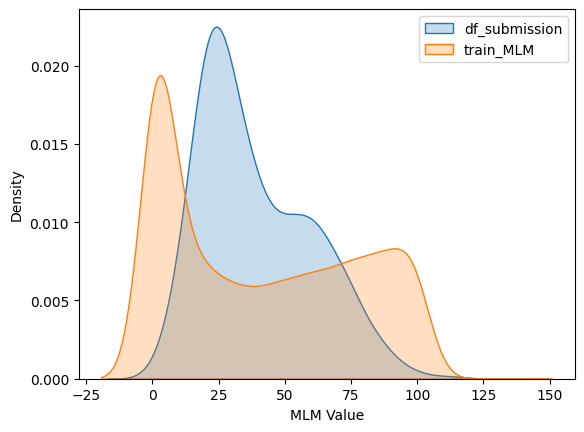

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn을 사용하여 KDE 플롯 그리기
sns.kdeplot(df_submission['MLM'], label='df_submission', shade=True)
sns.kdeplot(train_MLM['MLM'], label='train_MLM', shade=True)

# 레이블과 범례 추가
plt.xlabel('MLM Value')
plt.ylabel('Density')
plt.legend()

# 그래프 표시
plt.show()


In [ ]:
train_HLM

,id,SMILES,HLM,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea,...,RING_c1nc2[nH]ncc2s1,RING_c1cc2n(n1)CCC2,RING_c1cc2cc3c(nc2s1)CCC3,RING_O=C1OCCn2cncc21,RING_C1=Cc2ncccc2OC1,RING_c1cn2cncc2nn1,RING_O=C1C=CC2(CCCCC2)O1,RING_N=C1NC(=O)[C@@H]2CCCN12,RING_C1=CC2(CCNCC2)c2ccccc21,beyond_Lipinski
0,TRAIN_0000,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC,50.680,0.551836,0.192138,0.3125,0.153846,0.210526,0.576357,0.320878,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TRAIN_0001,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1,50.590,0.469473,0.108751,0.1250,0.076923,0.052632,0.498714,0.197453,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,TRAIN_0002,CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1,80.892,0.425948,0.105343,0.3125,0.000000,0.078947,0.456786,0.166470,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,TRAIN_0003,Cc1ccc(-c2ccc(-n3nc(C)c(S(=O)(=O)N4CCN(C5CCCCC...,2.000,0.666087,0.271376,0.3750,0.000000,0.131579,0.591786,0.251237,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,TRAIN_0004,Cc1ccc2c(c1)N(C(=O)c1ccncc1)CC(C)O2,99.990,0.482016,0.080898,0.1875,0.000000,0.026316,0.510500,0.110183,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5219,CHEMBL3736307,Cc1nc(C(=O)N(C)C)c(N)c2c1C(=O)N(Cc1ccccc1)C2=O,72.000,0.416654,0.139857,0.3125,0.076923,0.078947,0.465714,0.262483,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
5220,CHEMBL3736387,Cc1nc(C(=O)NC#N)c(N)c2c1C(=O)N(Cc1ccccc1)C2=O,99.000,0.379628,0.137290,0.3750,0.153846,0.078947,0.448571,0.354082,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
5221,CHEMBL3769968,C=CCOc1cc(F)c(F)cc1C1CC1CN.Cl,91.900,0.501285,0.087142,0.1250,0.076923,0.131579,0.338571,0.089997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5222,CHEMBL3798025,O=C(c1cc(-c2cccnc2)[nH]n1)N1CCN(C(c2ccccc2)c2c...,63.000,0.609340,0.211515,0.2500,0.076923,0.131579,0.595714,0.173977,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
